## Desafío - Clasificación desde la econometría


<br>
<br>

Nombre: Juan Oyarce

Profesor: Gabriel Tamayo

Generación: G2


* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

### Descripción


En esta sesión trabajaremos con:
* sbp : Presión Sanguínea Sistólica.
* tobacco : Promedio tabaco consumido por día.
* ldl : Lipoproteína de baja densidad.
* adiposity : Adiposidad.
* famhist : Antecedentes familiares de enfermedades cardiácas. (Binaria)
* types : Personalidad tipo A
* obesity : Obesidad.
* alcohol : Consumo actual de alcohol.
* age : edad.
* chd : Enfermedad coronaria. (dummy)


### Desafío 1: Preparar el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels .
* Importe la base de datos southafricanheart.csv  y elimine la columna 'Unnamed: 0'

In [1]:
# importación de las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn') # Gráficos estilo seaborn
# plt.rcParams["figure.figsize"] = (6, 3) # Tamaño gráficos
# plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [2]:
#carga del data set
df=pd.read_csv('southafricanheart.csv')
df.head()


,Unnamed: 0,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
df.drop(df.columns[[0]], axis=1, inplace=True) # eliminar la primera columna

In [4]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
print("La base de datos tiene ", df.shape[0], "observaciones y ", df.shape[1], " columnas")
print("Las variables de la base de datos son ", df.columns)

La base de datos tiene  462 observaciones y  10  columnas
Las variables de la base de datos son  Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')


### Desafío 2
A continuación se presenta el siguiente modelo a estimar:

$$\log\left(\frac{p({ chd=1})}{1 - p({ chd=1})}\right)={{\beta }_{0} + {\beta }_{1} \cdot {famhist}}$$


Para ello ejecute los siguientes pasos:

1. Recodifique famhist a dummy, asignando 1 a la categoría minoritaria.
2. Utilice smf.logit para estimar el modelo.
3. Implemente una función inverse_logit que realize el mapeo de log-odds a probabilidad.
4. Con el modelo estimado, responda lo siguiente:
    * ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?
    * ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?
    * ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?

Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados.

grafique ambas curvas con lmplot

In [6]:
# 1. recodificación variable Dummies

df['famhist'].value_counts()    # Present le asignamos 1 al ser la categoría minoritaria
famhist_dummies=pd.get_dummies(df.famhist, prefix='famhist', drop_first= True)
df=pd.concat([df,famhist_dummies], axis=1)
df.drop('famhist', axis=1, inplace=True) # Eliminamos la columna original




In [7]:
# 2.  smf.logit para estimar el modelo : Generamos una función para resumir los parametros

def concise_summary(mod, print_fit=True):
    """
    definición: Esta función sirve para extraer los valores y parametros principales de un modelo
    Input: Recibe un modelo de Statsmodel
    Outpout: Imprime las tablas asociadas a las salidas del modelo
    """
#guardamos los parámetros asociados a estadísticas de ajuste
    fit = pd.DataFrame({'Statistics': mod.summary2().tables[0][2][2:],
                'Value': mod.summary2().tables[0][3][2:]})
# guardamos los parámetros estimados por cada regresor.
    estimates = pd.DataFrame(mod.summary2().tables[1].loc[:, 'Coef.': 'Std.Err.'])
# imprimir fit es opcional
    if print_fit is True:
        print("\nGoodness of Fit statistics\n", fit)
        
    print("\nPoint Estimates\n\n", estimates)

In [8]:
# 2.  smf.logit para estimar el modelo

m1_logit = smf.logit('chd ~ famhist_Present', df).fit()
concise_summary(m1_logit)

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5

Goodness of Fit statistics
         Statistics       Value
2             BIC:    574.1655
3  Log-Likelihood:     -280.95
4         LL-Null:     -298.05
5     LLR p-value:  4.9371e-09
6           Scale:      1.0000
7                             

Point Estimates

                     Coef.  Std.Err.
Intercept       -1.168993  0.143106
famhist_Present  1.168993  0.203255


In [9]:
# 3.  Implemente una función inverse_logit que realize el mapeo de log-odds a probabilidad.

# caso evaluación = el Indidividuo presenta antecedents familiares de enfermedades
famhist_Present_eva = 1

# accedemos a los parámetros con la sintáxis modelo.params
estimate_y = m1_logit.params['Intercept'] + (m1_logit.params['famhist_Present'] * famhist_Present_eva)
print("El log odds estimado es de ", round(estimate_y, 3))

 

El log odds estimado es de  -0.0


In [10]:
def invlogit(x):
    return 1 / (1+np.exp(-x))
print("La probabilidad promedio de sufrir una enfermedad coronaria trás presentar antecedentes familiares es: ",round(invlogit(estimate_y), 2))



La probabilidad promedio de sufrir una enfermedad coronaria trás presentar antecedentes familiares es:  0.5


In [11]:
# caso evaluación = el Indidividuo NO presenta antecedents familiares de enfermedades
famhist_Present_eva = 0
estimate_y = m1_logit.params['Intercept'] + (m1_logit.params['famhist_Present'] * famhist_Present_eva)
print("El log odds estimado es de ", round(estimate_y, 3))

El log odds estimado es de  -1.169


In [12]:
print("La probabilidad promedio de sufrir una enfermedad coronaria sin presentar antecedentes familiares es: ",round(invlogit(estimate_y), 2))

La probabilidad promedio de sufrir una enfermedad coronaria sin presentar antecedentes familiares es:  0.24


In [13]:
# Diferencia de Probabilidad

Pp_antfam =round(invlogit(-0.0), 2)
Pp_sinfam= round(invlogit(-1.169), 2)
print('La diferencia de probabilidades de padecer una enfermedad coronaria entre un individuo con antecedentes y sin antecedentes familiares es: ',Pp_antfam -Pp_sinfam )

La diferencia de probabilidades de padecer una enfermedad coronaria entre un individuo con antecedentes y sin antecedentes familiares es:  0.26


In [29]:
# Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados.

m1_ols = smf.ols('chd ~ famhist_Present', df).fit()


concise_summary(m1_ols)




Goodness of Fit statistics
             Statistics     Value
2                 BIC:  601.4437
3      Log-Likelihood:   -294.59
4         F-statistic:     36.86
5  Prob (F-statistic):  2.66e-09
6               Scale:   0.21050

Point Estimates

                     Coef.  Std.Err.
Intercept        0.237037  0.027922
famhist_Present  0.262963  0.043313


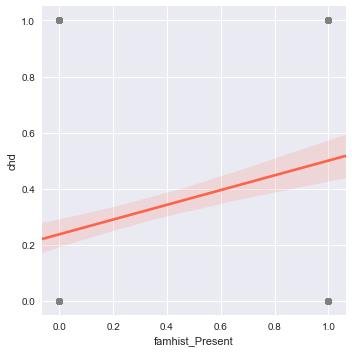

In [15]:
# gráfica Modelo líneal probabilístico

sns.lmplot('famhist_Present','chd', df,
line_kws={'color':'tomato'},
scatter_kws={'color': 'grey', 'alpha': .5});

Una observación tiene igual probabilidad en ambos sucesos cuando x =  1.0


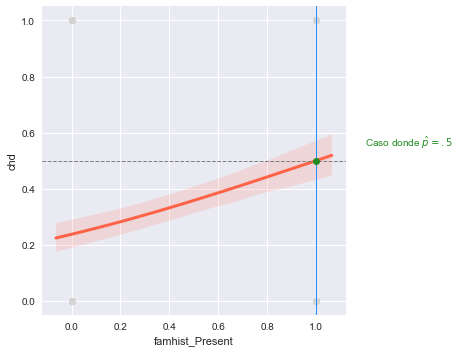

In [16]:
# gráfica Modelo de regresión logística

sns.lmplot('famhist_Present', 'chd', df,
logistic=True,
line_kws={'color':'tomato', 'lw': 3},
scatter_kws={'color': 'lightgrey', 'alpha': .5})
decision_boundary = - m1_logit.params['Intercept'] / m1_logit.params['famhist_Present']
plt.axvline(decision_boundary, lw=1, color='dodgerblue')
plt.axhline(.5, linestyle='--', color='grey', lw=1)
plt.text(decision_boundary+.2, .5+.05, r'Caso donde $\hat{p}=.5$', color='forestgreen')
plt.plot(decision_boundary, .5, 'o', color='forestgreen')
print("Una observación tiene igual probabilidad en ambos sucesos cuando x = ",
round(decision_boundary, 3));


* Podemos apreciar que ambos modelos se aproximan al mismo resultado, por ejemplo la suma de los valores de los coeficientes del modelo de regresión líneal se aproximan a 0.5 que se puede interpretar, con ciertas restricciones, como la probabilidad de ocurrencia, aunque no es una probabilidad directa porque los modelos de regresión lineal tienen coeficientes que pueden ser superiores al intervalo de probabilidad (0, 1), por está razon se requieren modelos de regresión logística, cuyo inverso de odds, para éste caso, nos arrojó una probabilidad de 0.5, lo que en pocas palabras quiere decir que hay un 50 % de probabilidad de sufrir un accidente coronario en caso de que éste presente el antecedente familiar de ésta causa. 

### Desafío 3

Implemente un modelo con la siguiente forma

$$\log\left(\frac{p({ chd=1})}{1 - p({ chd=1})}\right)={{\beta }_{0} + \sum_{j=0}^N {\beta }_{j} \cdot {X}}$$



1. Depure el modelo manteniendo las variables con significancia estadística al 95%.
2. Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.


In [32]:
variables= list(df.columns)
variables.remove('chd') # Para evitar un error de colinealidad removemos la variable dependiente de la lista
var=' + '.join(variables)
m1_logit = smf.logit('chd ~ '+ var, df).fit()
m1_logit.summary2()
 

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.208     
Dependent Variable: chd              AIC:              492.1400  
Date:               2019-07-24 13:23 BIC:              533.4957  
No. Observations:   462              Log-Likelihood:   -236.07   
Df Model:           9                LL-Null:          -298.05   
Df Residuals:       452              LLR p-value:      2.0548e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -6.1507   1.3083 -4.7015 0.0000 -8.7149 -3.5866
sbp                0.0065   0.0057  1.1350 0.2564 -0.0047  0.0177
tobacco            0.0794   0.0266  2.9838 0.0028  0.0272  0.1315
ldl                0.1739   0.0597  2.9152 0.0036  0.0570  0.2909
adiposity          0.0186   0.0293  0.6346 0.5257 -0.0388  0.0760
typea              0.0396   0.0123  3.2138 0.0013  0.0154  0.0637
obesity           -0.0629   0.0442 -1.4218 0.1551 -0.1496  0.0238
alcohol            0.0001   0.0045  0.0271 0.9784 -0.0087  0.0089
age                0.0452   0.0121  3.7285 0.0002  0.0215  0.0690
famhist_Present    0.9254   0.2279  4.0605 0.0000  0.4787  1.3720
=================================================================

"""

In [33]:
# Extraemos las variables cuyos p-values son estadisticamente significativos
pvalues = m1_logit.pvalues
print ('Las siguientes variables son estadísticamente significativas: ')        
means_values= pd.Series(pvalues).where(lambda x : x<0.05).dropna() 
print(means_values)

    


Las siguientes variables son estadísticamente significativas: 
Intercept          0.000003
tobacco            0.002847
ldl                0.003555
typea              0.001310
age                0.000193
famhist_Present    0.000049
dtype: float64


### Analizamos el efecto log odds de las variables estadísticamente significativas





In [19]:
# variables categórica

# caso evaluación = el Indidividuo presenta antecedents familiares de enfermedades
famhist_Present_eva = 1

# accedemos a los parámetros con la sintáxis modelo.params

estimate_y = m1_logit.params['Intercept'] + (m1_logit.params['famhist_Present'] * famhist_Present_eva)
print("El log odds estimado es de ", round(estimate_y, 3))

El log odds estimado es de  -5.225


Este log odds nos indica que a medida que aumentan el numero de variables el modelo disminuye el impacto de historia familiar en el intercepto de éste.

In [20]:
# variables numéricas

variables= list(means_values.index)
variables.remove('Intercept')
variables.remove('famhist_Present')
for var in variables:
    estimate_y = m1_logit.params['Intercept'] + (m1_logit.params[var] * df[var].mean())
    print("El log odds estimado para ", var, " es de ", round(estimate_y, 3))
   

El log odds estimado para  tobacco  es de  -5.862
El log odds estimado para  ldl  es de  -5.326
El log odds estimado para  typea  es de  -4.048
El log odds estimado para  age  es de  -4.214


Los log odds calculados sobre el impacto de las variables promedio predictoras nos indican que a medida que aumentan el numero de variables el modelo disminuye el impacto individual. En este caso las variables edad  y personalidad de tipo A son más influyentes que la variable consumo de tabaco y perfil lipídico

In [21]:
# generamos un modelo con variables estadísticamente significativas

variables= list(means_values.index)
variables.remove('Intercept') # Removemos el Intercepto
var=' + '.join(variables)
m2_logit = smf.logit('chd ~ '+ var, df).fit()
m2_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: chd              AIC:              487.6856  
Date:               2019-07-23 22:50 BIC:              512.4990  
No. Observations:   462              Log-Likelihood:   -237.84   
Df Model:           5                LL-Null:          -298.05   
Df Residuals:       456              LLR p-value:      2.5537e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -6.4464   0.9209 -7.0004 0.0000 -8.2513 -4.6416
tobacco            0.0804   0.0259  3.1057 0.0019  0.0297  0.1311
ldl                0.1620   0.0550  2.9470 0.0032  0.0543  0.2697
typea              0.0371   0.0122  3.0505 0.0023  0.0133  0.0610
age                0.0505   0.0102  4.9442 0.0000  0.0305  0.0705
famhist_Present    0.9082   0.2258  4.0228 0.0001  0.4657  1.3507
=================================================================

"""

### Desafío 4: Estimación de perfiles
A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas
a probabilidades con inverse_logit . Los perfiles a estimar son los siguientes:
* La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.
* La probabilidad de tener una enfemerdad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.
* La probabilidad de tener una enfemerdad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

* La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.

In [43]:
# Definimos un individuo representativo (promedio de la muestra) para las variables depuradas
"""


['tobacco'].mean()
['ldl'].mean()
['typea'].mean()
['age'].mean()
['famhist_Present']*0 # no presentar antecedentes familiares es la característica más representativa

"""

"\n\n\n['tobacco'].mean()\n['ldl'].mean()\n['typea'].mean()\n['age'].mean()\n['famhist_Present']*0 # no presentar antecedentes familiares es la característica más representativa\n\n"

In [59]:
# Formulamos el modelo con los valores de los individuos representativos

estimate_y_2 =  m2_logit.params['Intercept'] +  m2_logit.params['famhist_Present'] * 0  +  m2_logit.params['tobacco'].mean() 
+ m2_logit.params['ldl'].mean() + m2_logit.params['typea'].mean()+ m2_logit.params['age'].mean() 
 



0.249567231636427

-La probabilidad de un individuo representativo de padecer un accidente coronario es aproximadamente 25 %

* La probabilidad de tener una enfemerdad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [48]:
#Lo primero es determinar que valores del rango de la muestra se corresponden a un individuo con altos niveles de LDL

df['ldl'].max() # aplicamos el parametro max.

15.33

In [61]:
# Formulamos el modelo con los valores de los individuos representativos, añadiendo max a LDL

estimate_y_3 = m2_logit.params['Intercept'] +  m2_logit.params['famhist_Present'] * 0  +  m2_logit.params['tobacco'].mean() 
+ m2_logit.params['ldl'].max() + m2_logit.params['typea'].mean()+ m2_logit.params['age'].mean()

0.249567231636427

-La probabilidad de un individuo  con altos niveles de LDL y el resto de las variables constantes, de padecer un accidente coronario es aproximadamente 25 %, es decir no hay cambio significativo

* La probabilidad de tener una enfemedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [63]:
#Lo primero es determinar que valores del rango de la muestra se corresponden a un individuo con altos niveles de LDL

df['ldl'].min() # aplicamos el parametro min.

0.98

In [64]:
# Formulamos el modelo con los valores de los individuos representativos, añadiendo min a LDL

estimate_y_3 = m2_logit.params['Intercept'] +  m2_logit.params['famhist_Present'] * 0  +  m2_logit.params['tobacco'].mean() 
+ m2_logit.params['ldl'].min() + m2_logit.params['typea'].mean()+ m2_logit.params['age'].mean()

0.249567231636427

-La probabilidad de un individuo  con bajos niveles de LDL y el resto de las variables constantes, de padecer un accidente coronario es aproximadamente 25 %, es decir no hay cambio significativo, ésto se puede deber a que si bien los valores de LDL son estadísticamente significativos en la muestra, el coeficiente en la regresión es bajo (0.16) vs el historial familiar (0.9) que es una variable determinante de ésta regresión log. 